# <p style="text-align: right;">Varun Sridhar (vks377)</p>
# <p style="text-align: right;">Atreya Misra (am73676)</p>
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

## Answer

In [4]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

lasso = Lasso(random_state=0)
ridge = Ridge(random_state=0)

alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clfLasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring="neg_mean_squared_error")
clfLasso.fit(X_train, y_train)

scoresLasso = clfLasso.cv_results_['mean_test_score']

clfRidge = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False, scoring="neg_mean_squared_error")
clfRidge.fit(X_train, y_train)

scoresRidge = clfRidge.cv_results_['mean_test_score']

print("Lasso: ", alphas[np.argmax(scoresLasso)])
print("Ridge: ", alphas[np.argmax(scoresRidge)])


('Lasso: ', 0.008737642000038414)
('Ridge: ', 0.0050000000000000001)


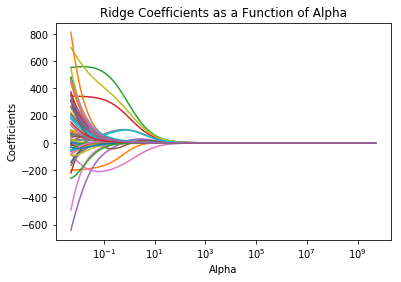

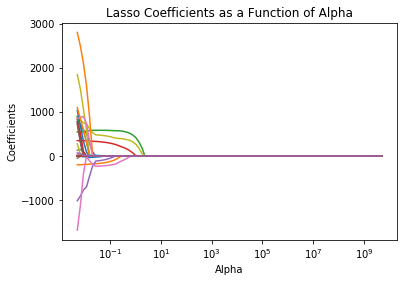

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ridgeCoefs = []
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    ridgeCoefs.append(ridge.coef_)
    
ax = plt.gca()

ax.plot(alphas, ridgeCoefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Alpha')
plt.show()

lassoCoefs = []
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    lassoCoefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, lassoCoefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.show()


As the alphas increase, the coefficients go towards zero.

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
predictY = reg.predict(X_test)
print("MSE for LSR: ", mean_squared_error(y_test, predictY))

ridge = Ridge(alpha = alphas[np.argmax(scoresRidge)])
ridge.fit(X_train, y_train)
predictY = ridge.predict(X_test)
print("MSE for Ridge: ", mean_squared_error(y_test, predictY))

lasso = Lasso(alpha = alphas[np.argmax(scoresLasso)])
lasso.fit(X_train, y_train)
predictY = lasso.predict(X_test)
print("MSE for Lasso: ", mean_squared_error(y_test, predictY))

('MSE for LSR: ', 3501.5167251313146)
('MSE for Ridge: ', 2946.794770721217)
('MSE for Lasso: ', 2961.4375901194871)


In [7]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Best lambda: ", lasso_cv.alpha_)
print("Coefficients: ", lasso_cv.coef_)

('Best lambda: ', 0.0064210047299374752)
('Coefficients: ', array([   -6.41033505,  -197.57695949,   546.9846375 ,   348.23882294,
        -920.20114717,   726.91383711,    31.98462597,   -14.80954929,
         817.15834216,     5.94086981,     0.        ,  2527.81172745,
           0.        ,     0.        ,     0.        ,    -0.        ,
           0.        ,     0.        ,  1554.85141873,    -0.        ,
          -0.        ,     0.        ,   496.50450943,     0.        ,
           0.        ,     0.        , -1188.61168992,     0.        ,
           0.        ,   664.16443725,   724.09506593,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
         875.45007512,   151.45850921,    66.59384692,     0.        ,
         374.64761997,    -0.        ,     0.        ,    -0.        ,
           0.        ,     0.        ,     0.        ,    -0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
          -0.    

There are many zeroed-out coefficients for the best lambda.

# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



1. In the case where the quadratic model overfits the data, the linear model would be preferred.
2. If there is a lot of colinearity within the data, the quadratic model could potentially amplify the colinearity.

# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

As K increases, variance decreases and bias increases.  As K decreases, variance increases and bias decreases.

# Question 4: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 2 scatterplots of "rent" against "demo_score", and "inst" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

('Rent upper outlier cutoff:', 67.524999999999991)
('Rent lower outlier cutoff:', -9.0749999999999993)
('Demo score upper outlier cutoff:', 153.75)
('Demo score lower outlier cutoff:', -56.25)
Including outliers would increase the variance and worsen the prediction model


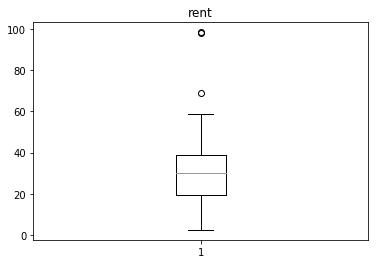

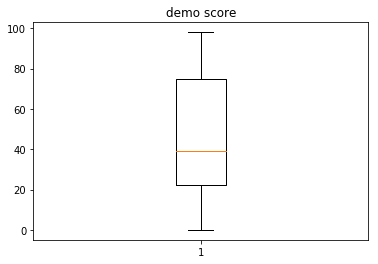

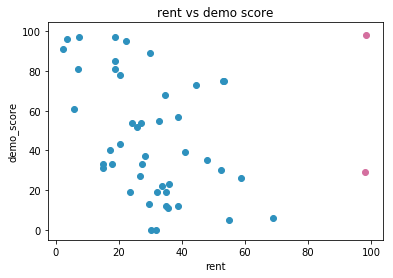

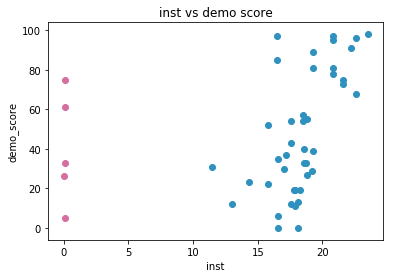

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("russett_full_v2.csv")
plt.boxplot(df['rent'])
plt.title('rent')

rent_data = df['rent']
rent_upper_quartile = np.percentile(rent_data, 75)
rent_lower_quartile = np.percentile(rent_data, 25)
rent_iqr = rent_upper_quartile - rent_lower_quartile
print("Rent upper outlier cutoff:", rent_upper_quartile + (1.5*rent_iqr))
print("Rent lower outlier cutoff:", rent_lower_quartile - (1.5*rent_iqr))

plt.figure()
plt.boxplot(df['demo_score'])
plt.title('demo score')

demo_score_data = df['demo_score']
demo_score_upper_quartile = np.percentile(demo_score_data, 75)
demo_score_lower_quartile = np.percentile(demo_score_data, 25)
demo_score_iqr = demo_score_upper_quartile - demo_score_lower_quartile
print("Demo score upper outlier cutoff:", demo_score_upper_quartile + (1.5*demo_score_iqr))
print("Demo score lower outlier cutoff:", demo_score_lower_quartile - (1.5*demo_score_iqr))

plt.figure()
plt.scatter(df['rent'][np.abs(df['rent'])<80],df['demo_score'][np.abs(df['rent'])<80], color="#2e91be")
plt.scatter(df['rent'][np.abs(df['rent'])>=80],df['demo_score'][np.abs(df['rent'])>=80], color="#d46f9f")
#x[np.abs(y)<1], y[np.abs(y)<1]

plt.xlabel('rent')
plt.ylabel('demo_score')
plt.title('rent vs demo score')

plt.figure()
plt.scatter(df['inst'][np.abs(df['inst'])<10],df['demo_score'][np.abs(df['inst'])<10], color="#d46f9f")
plt.scatter(df['inst'][np.abs(df['inst'])>=10],df['demo_score'][np.abs(df['inst'])>=10], color="#2e91be")
plt.xlabel('inst')
plt.ylabel('demo_score')
plt.title('inst vs demo score')

print('Including outliers would increase the variance and worsen the prediction model')
      

In [9]:
X=df[['rent', 'inst', 'ecks']]
y=df['demo_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predictedtrain=reg.predict(X_train)
y_predictedtest=reg.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_train, y_predictedtrain))
print ('X_Train test', rmse)

rmse = sqrt(mean_squared_error(y_test, y_predictedtest))

print ('X_Test test', rmse)

('X_Train test', 25.55900184499996)
('X_Test test', 33.501251806077235)


In [10]:
from sklearn.linear_model import HuberRegressor
hub = HuberRegressor(alpha=0.0)
hub.fit(X_train, y_train)
y_hub_predict_train=hub.predict(X_train)
y_hub_predict_test=hub.predict(X_test)

rmse = sqrt(mean_squared_error(y_train, y_hub_predict_train))
print ('X_Train test', rmse)

rmse = sqrt(mean_squared_error(y_test, y_hub_predict_test))

print ('X_Test test', rmse)

('X_Train test', 26.43390552294065)
('X_Test test', 30.95435264029095)


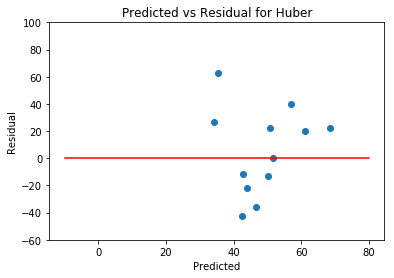

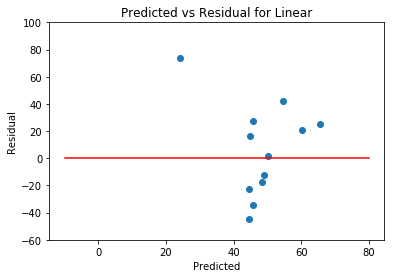

In [11]:
xlab='Predicted'
ylab='Residual'
 
plt.scatter(y_hub_predict_test, y_test-np.array(y_hub_predict_test))
plt.plot(np.linspace(-10,80,10),np.linspace(0,0,10), "r")
plt.ylim((-60,100))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("Predicted vs Residual for Huber")
plt.show()
 
plt.scatter(y_predictedtest,y_test-np.array(y_predictedtest))
plt.plot(np.linspace(-10,80,10),np.linspace(0,0,10), "r")
plt.ylim((-60,100))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("Predicted vs Residual for Linear")
plt.show()

For ordinary least squares regression, outliers have a squared effect on the final model.  In Huber loss, smaller residuals have a squared effect, but the effect of larger outliers have only a linear weight, so larger residuals do not disproportionately affect the model.

# Question 5 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

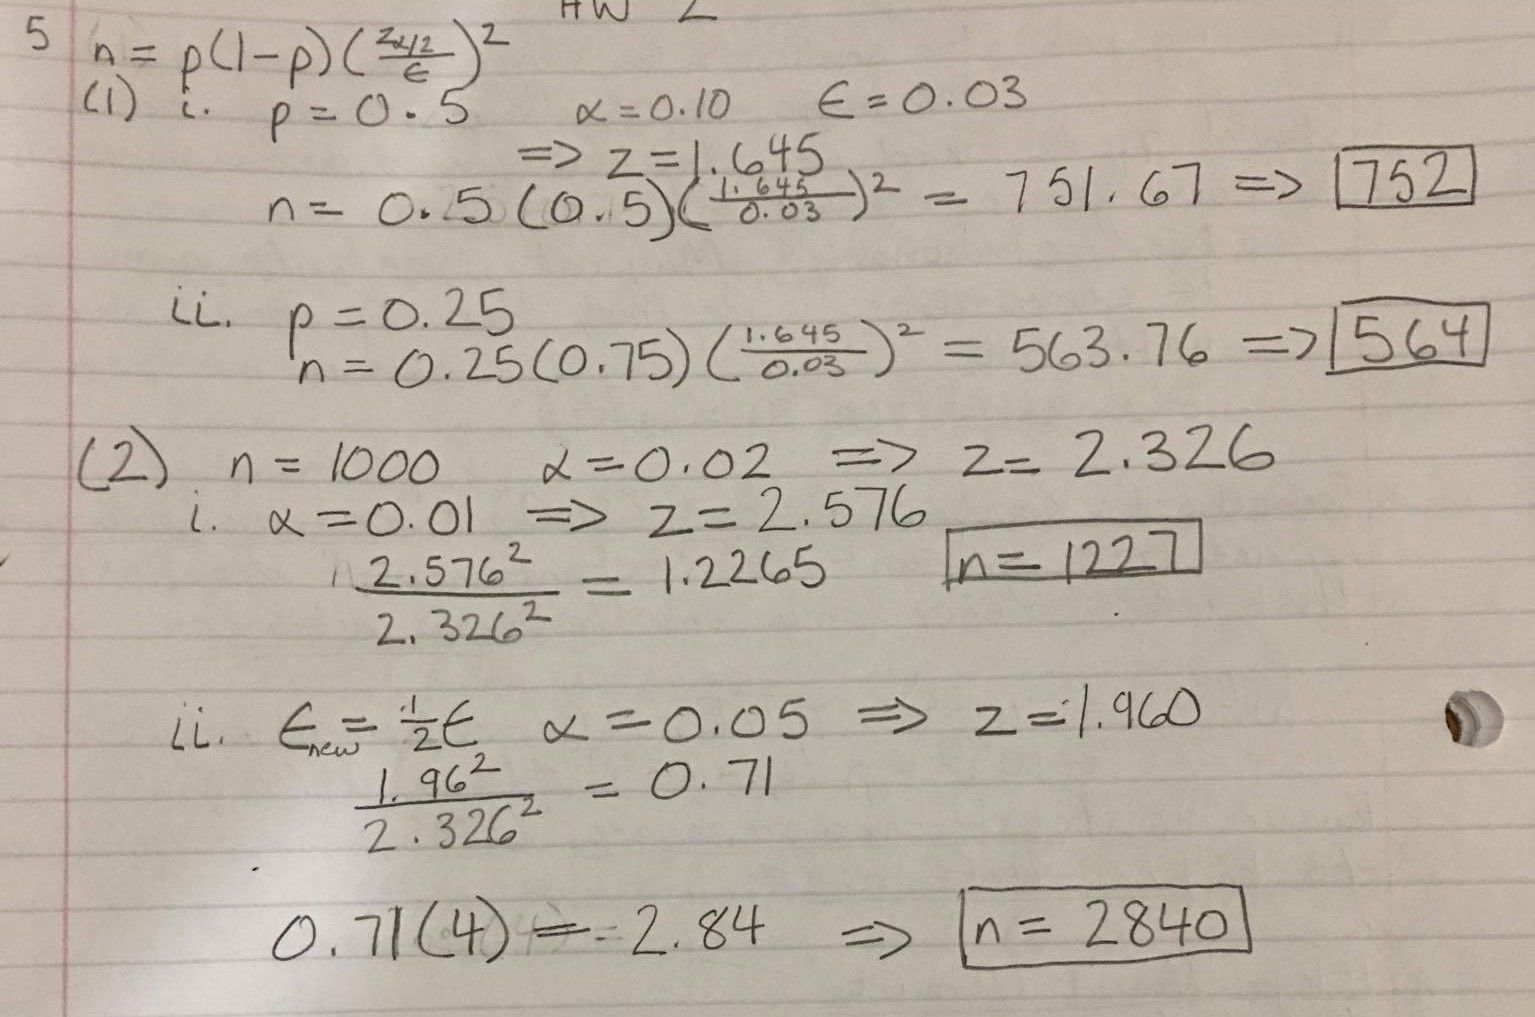

# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [12]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [13]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  (This is called Principal Components Regression). Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

('N1 is', 3)
('N2 is', 9)
('N3 is', 27)
(5120.6055477937234, 'MSE Based on N1')
(3942.7867514263494, 'MSE Based on N2')
(2857.425949000683, 'MSE Based on N3')


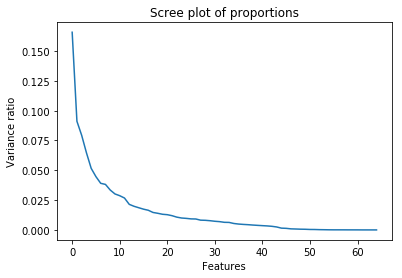

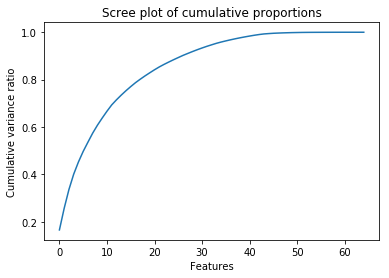

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree plot of proportions")
plt.xlabel("Features")
plt.ylabel('Variance ratio')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Scree plot of cumulative proportions")
plt.xlabel("Features")
plt.ylabel('Cumulative variance ratio')

i=0
a=0
while a<.3:
    i+=1
    pca = PCA(n_components=i)
    pca.fit(X)
    X_N1=pca.fit_transform(X)
    a=sum(pca.explained_variance_ratio_)
    
N1=i
print('N1 is', N1)
while a<.6:
    i+=1
    pca = PCA(n_components=i)
    pca.fit(X)
    X_N2=pca.fit_transform(X)
    a=sum(pca.explained_variance_ratio_)
    
N2=i
print('N2 is', N2)
while a<.9:
    i+=1
    pca = PCA(n_components=i)
    pca.fit(X)
    X_N3=pca.fit_transform(X)
    a=sum(pca.explained_variance_ratio_)
N3=i
print('N3 is', N3)

y=diabetes.target

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_N1, y)
y_predict=reg.predict(X_N1)
rmse = mean_squared_error(y, y_predict)
print (rmse, "MSE Based on N1")

reg.fit(X_N2, y)
y_predict=reg.predict(X_N2)
rmse = mean_squared_error(y, y_predict)
print (rmse, "MSE Based on N2")

reg.fit(X_N3, y)
y_predict=reg.predict(X_N3)
rmse = mean_squared_error(y, y_predict)
print (rmse, "MSE Based on N3")